# **Capston Project -End to End Machine Learning**  

### **Project Type**    - Supervised Learning: Regression
### **Project** - Yes bank stock closing price prediction
### **Contribution** - Individual
### **Name** - **Abhishek Gupta**

# **GitHub Link**

# **Project Summary -**

Yes Bank is a banking company that was founded in 2004 that offers a wide range of differentiated products for its corporate and retail customers through retail banking and asset management services. It is also a publically traded company. That provides an opportunity for anyone to invest in Yes bank and become a shareholder. But at the same time, it means that the valuation of the company is now in the hands of investors and speculators as share prices are often heavily impacted by public opinion. We have used yes bank stock price data set. This dataset contains 5 different features that can be used for predicting close price prediction using machine learning. We have built machine learning regression model for price prediction. We have used some of best models.

# **Problem Statement**

Yes Bank is a well-known bank in the Indian financial domain. Since 2018, it has been in the news because of the fraud case involving Rana Kapoor. Owing to this fact, it was interesting to see how that impacted the stock prices of the company and whether Time series models or any other predictive models can do justice to such situations. This dataset has monthly stock prices of the bank since its inception and includes closing, starting, highest, and lowest stock prices of every month.

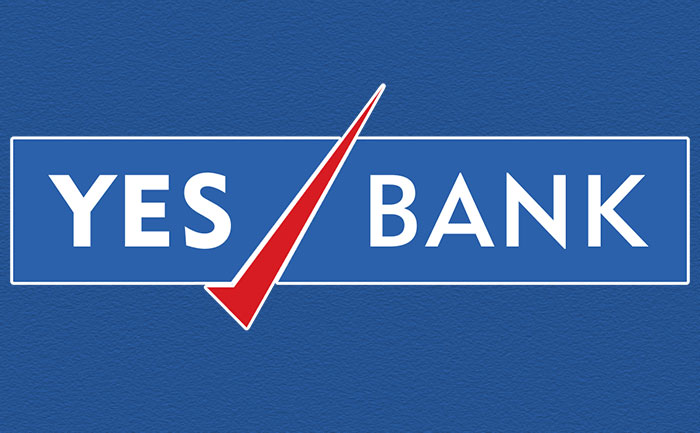

**Project Type - Linear Regression**

# **Let's Begin !**


# **1) Deep dive into data : Let's Know our Data**

**Import all the necessary libraries**

In [ ]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import math
from datetime import datetime
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge,Lasso,ElasticNet
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (r2_score,
mean_squared_error,  mean_absolute_percentage_error,
mean_absolute_error)
from sklearn import metrics


**Supress Warnings**

In [ ]:
import warnings
warnings.filterwarnings('ignore')

**Load the dataset for analysis**

In [ ]:
# Mounting Google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Dataset Loading**

In [ ]:
#Loading the Dataset
stock= pd.read_csv("/content/drive/MyDrive/Datasets/YesBank_StockPrices.csv")

In [ ]:
#creating a shallow copy of the dataset
#This is done so that the original dataset remains intact
#We will perform all analysis on this shallow copy

stock_df=stock.copy()

**Dataset first veiw**

In [ ]:
#dataset first veiw
stock_df

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41
...,...,...,...,...,...
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42


In [ ]:
#head funtion returns the first 5 rows of data
stock_df.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [ ]:
#Tail function returns the last 5 rows of data
stock_df.tail()

,Date,Open,High,Low,Close
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42
184,Nov-20,12.41,14.90,12.21,14.67


In [ ]:
#Sample function returns the randon 'n' rows of data
stock_df.sample(n = 10)

,Date,Open,High,Low,Close
61,Aug-10,59.40,68.88,59.01,62.22
51,Oct-09,41.20,52.34,36.80,47.31
148,Nov-17,315.50,329.80,296.00,306.80
67,Feb-11,53.00,57.69,46.71,51.29
87,Oct-12,76.40,84.20,75.60,82.29
153,Apr-18,305.00,368.75,303.30,362.05
158,Sep-18,347.20,350.00,166.15,183.45
49,Aug-09,31.98,35.18,29.00,33.45
24,Jul-07,35.98,41.04,35.02,37.93
182,Sep-20,14.30,15.34,12.75,13.15


**Dataset row and column count**

In [ ]:
#Shape method returns the dimension of dataframe

a=stock_df.shape
print(f"No of rows in dataframe:{a[0]}")
print(f"No of columns in dataframe:{a[1]}")

No of rows in dataframe:185
No of columns in dataframe:5


In [ ]:
# Displays only the specific number of columns of the dataframe
# syntax: pd.set_option("display.max_columns",total_no_of_columns_present_or_want_to_display when printing the dataframe)
pd.set_option("display.max_columns",None)
stock_df

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41
...,...,...,...,...,...
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42


**Dataset Information**

In [ ]:
# info method prints information about a DataFrame
#including the index and dtype of columns,
#non-null values and memory usage

stock_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


**Duplicate Values**

In [ ]:
#calculating count of duplicate value in dataset
duplicates= stock_df.duplicated().sum()
duplicate_count = int(duplicates)
print(duplicate_count)

0


In [ ]:
stock_df.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0


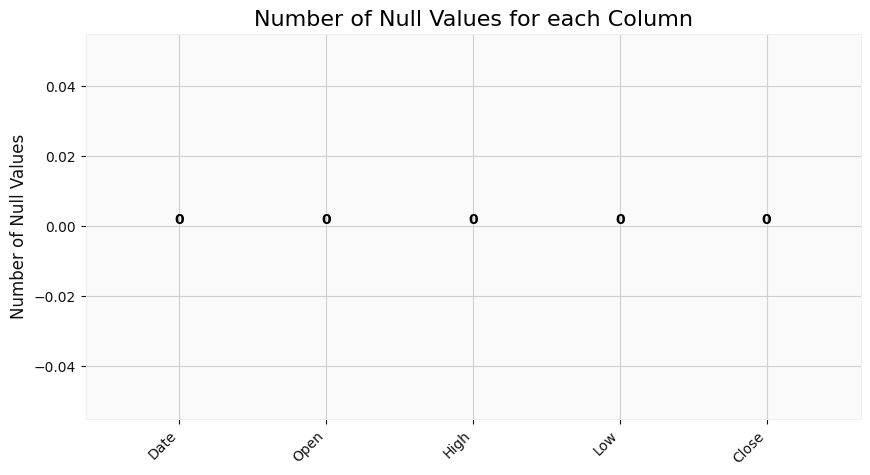

In [ ]:
# Compute missing values per column
missing_values = stock_df.isnull().sum()

# Create the bar chart

plt.figure(figsize=(10, 5))  # Set figure size
bars= plt.bar(missing_values.index, missing_values.values, color='skyblue')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, str(height),
             ha='center', va='bottom', fontsize=10, fontweight='bold')

# Customize the plot
plt.ylabel("Number of Null Values", fontsize=12)  # Y-axis label
plt.title("Number of Null Values for each Column", fontsize=16)  # Title

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')


# Show the plot
plt.show()

**What did you know about your dataset?**

**Dataset Overview**

The dataset represents the historical stock data of Yes Bank. It contains 185 records with the following columns:

**Date:** The date of the record (in "Month-Year" format).

**Open:** The opening price of Yes Bank stock on that particular date.

**High:** The highest price reached by Yes Bank stock on that date.

**Low:** The lowest price reached by Yes Bank stock on that date.

**Close:** The closing price of Yes Bank stock on that particular date.

There are **185 datapoints** in total, with the stock price ranging from **July-2005 to November-2020**.The date column containing inappropriate datatype marked as object type which we need to be convertered into proper dattime datatype in order to get trends and seasonal data accordingly , the **columns Open, High, Low  and Close are of float64 type**  representing the numerical values for thoso columns. The **dataset neither contains any null values nor any kind of duplicate values**.

# **2) Understanding our Variables**



In [ ]:
# Describing dataset
# Gives us a statistical overveiw of all the numerical columns present in our dataset
# Includes count,min,max,mean,median,standard deviation
stock_df.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


In [ ]:
#Finding all the columns of a dataset
stock_df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

### **checking Unique Values for each variable**

In [ ]:
# Find unique values for all columns at a time
unique_values_per_column = stock_df.apply(pd.Series.unique)
print(unique_values_per_column)

Date     [Jul-05, Aug-05, Sep-05, Oct-05, Nov-05, Dec-0...
Open     [13.0, 12.58, 13.48, 13.2, 13.35, 13.49, 13.68...
High     [14.0, 14.88, 14.87, 14.47, 13.88, 14.44, 17.1...
Low      [11.25, 12.55, 12.27, 12.4, 12.88, 13.0, 13.58...
Close    [12.46, 13.42, 13.3, 12.99, 13.41, 13.71, 15.3...
dtype: object


### **Variables Description**

**1. Date [Type: object (string)]**

Represents the date on which the stock data was recorded.
Format: "Month-Year" (e.g., "Jul-05", "Aug-05", etc.).
This column is used to identify the time period for the respective stock data.

**2. Open [Type: float64]**

Represents the opening price of Yes Bank stock on the given date.
This is the price of the stock when the market opens on that particular day.
It is one of the key indicators of how the stock is performing on a specific day.

**3. High [Type: float64]**

Represents the highest price reached by Yes Bank stock during the trading day.
This value indicates the peak price the stock reached within that trading day, showing the highest market valuation.

**4. Low [Type: float64]**

Represents the lowest price reached by Yes Bank stock during the trading day.
This is the bottom price that the stock reached during that day's trading session. It shows the lowest valuation that the stock had during the trading day.

**5. Close [Type: float64]**

Represents the closing price of Yes Bank stock on the given date.
This is the price of the stock when the market closes for the day.
The closing price is one of the most important metrics for tracking the performance of a stock because it reflects the final market consensus of the stock's value for that day.


#**3) Data Wrangling & EDA**

####**Converting Date Column**

In [ ]:

# Convert to datetime
stock_df['Date'] = pd.to_datetime(stock_df['Date'], format='%b-%y')

# Keep only month and year (set day to 1)
stock_df['Date'] = stock_df['Date'].dt.to_period('M').dt.to_timestamp()

# Remove time part from display (convert to date)
stock_df['Date'] = stock_df['Date'].dt.date

# Sort and reset index
stock_df = stock_df.sort_values('Date').reset_index(drop=True)


In [ ]:
# Cross verify the datatype of Date Column
stock_df["Date"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 185 entries, 0 to 184
Series name: Date
Non-Null Count  Dtype 
--------------  ----- 
185 non-null    object
dtypes: object(1)
memory usage: 1.6+ KB


In [ ]:
#Starting Date of stock price in dataset
stock_df["Date"].min()

datetime.date(2005, 7, 1)

In [ ]:
#Last date of Stock price in datatset
stock_df["Date"].max()

datetime.date(2020, 11, 1)

**Adding Year Column**

In [ ]:
#Creating Year Column for Analysis
# Assume data starts from July 2005

stock_df['Year'] = [i//12 + 2005 for i in range(len(stock_df))]



In [ ]:
#Getting Unique Value of Year column
stock_df["Year"].unique()

array([2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
       2016, 2017, 2018, 2019, 2020])

###**Univariate analysis**

**List of columns**

In [ ]:
#list the all columns we do have
columns = list(stock_df.columns)
columns

['Date', 'Open', 'High', 'Low', 'Close', 'Year']

**Outlier Detection**

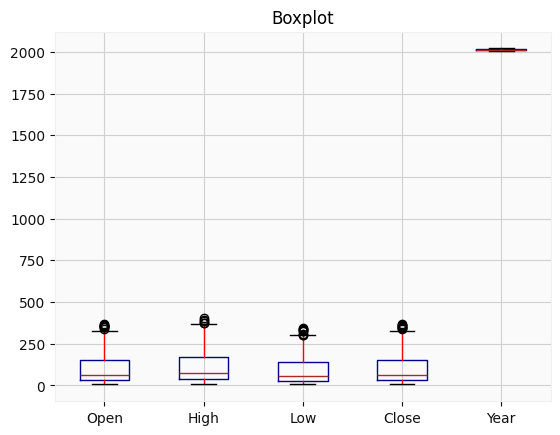

In [ ]:
# Plot the distribution of each column.
# we will use box plot to show the distribution of all the numeric columns

ax = stock_df[columns].plot(
    kind='box',
    title='Boxplot',
    color={
        'boxes': 'darkblue',
        'whiskers': 'red',
        'caps': 'black',
        'medians': 'brown'
    }
)
plt.show()


**Distribution of each feature**

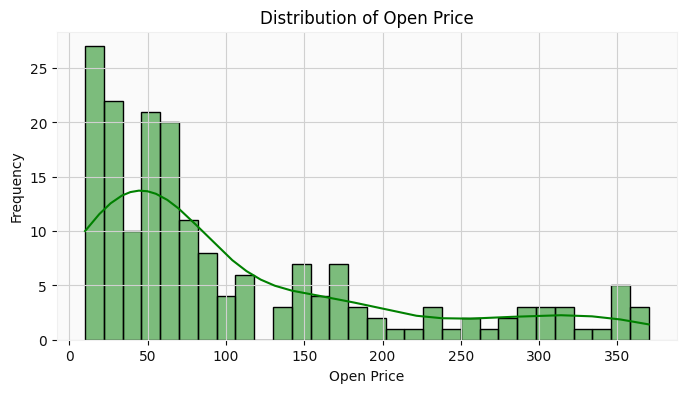

Why this chart: To observe the distribution and skewness of Open prices.
Insights: Outliers and skewed patterns observed due to major price fluctuations over years.
Business Impact: Helps in normalization decisions for modeling, detecting non-stationary behavior.


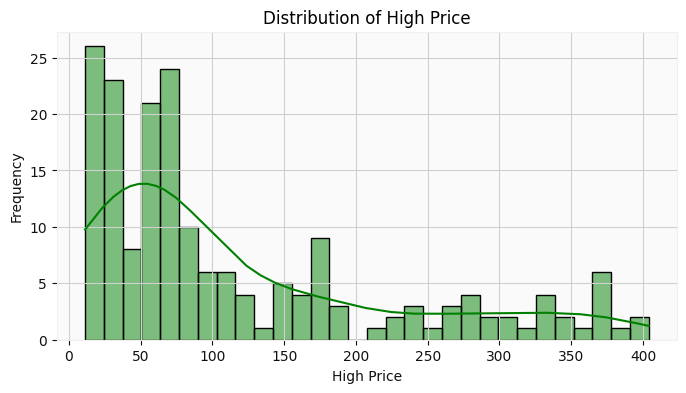

Why this chart: To observe the distribution and skewness of High prices.
Insights: Outliers and skewed patterns observed due to major price fluctuations over years.
Business Impact: Helps in normalization decisions for modeling, detecting non-stationary behavior.


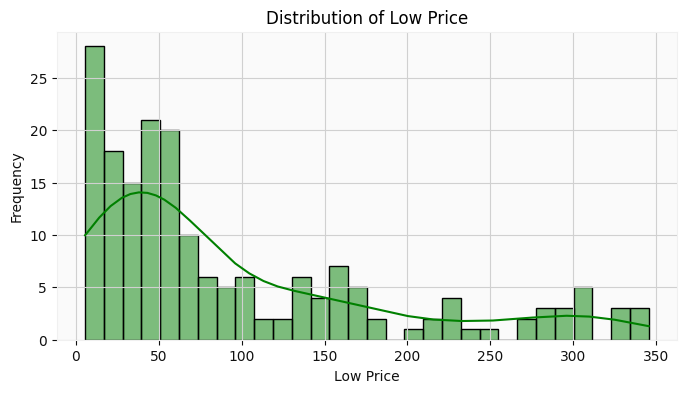

Why this chart: To observe the distribution and skewness of Low prices.
Insights: Outliers and skewed patterns observed due to major price fluctuations over years.
Business Impact: Helps in normalization decisions for modeling, detecting non-stationary behavior.


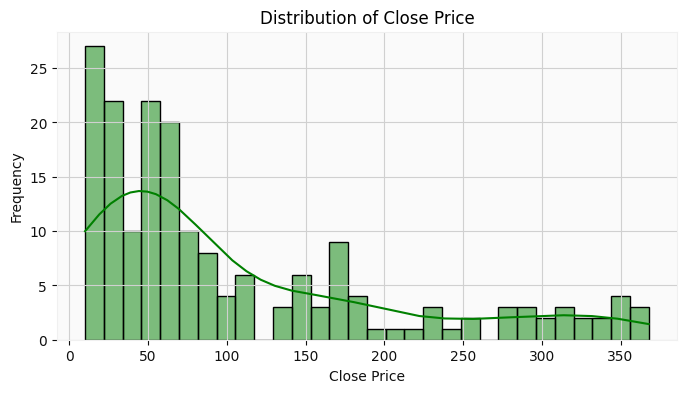

Why this chart: To observe the distribution and skewness of Close prices.
Insights: Outliers and skewed patterns observed due to major price fluctuations over years.
Business Impact: Helps in normalization decisions for modeling, detecting non-stationary behavior.


In [ ]:
# Chart - 1 visualization code
features = ['Open', 'High', 'Low', 'Close']
for feature in features:
    plt.figure(figsize=(8,4))
    sns.histplot(stock_df[feature], kde=True, bins=30, color='green')
    plt.title(f'Distribution of {feature} Price')
    plt.xlabel(f'{feature} Price')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

    print(f"Why this chart: To observe the distribution and skewness of {feature} prices.")
    print("Insights: Outliers and skewed patterns observed due to major price fluctuations over years.")
    print("Business Impact: Helps in normalization decisions for modeling, detecting non-stationary behavior.")

**Combined distribution of all the features**

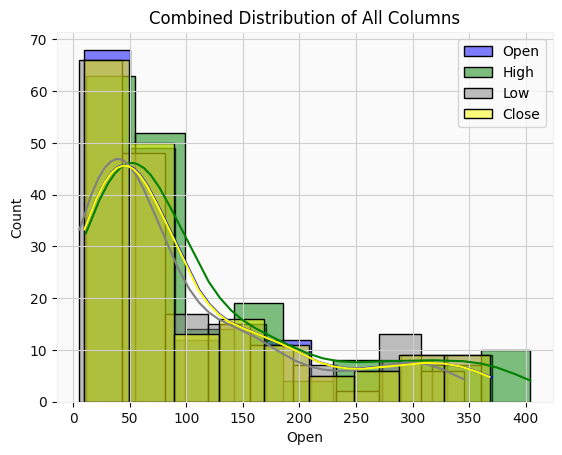

In [ ]:
# # lets see the histogram plot for each column in one chart so we can interprate that how they are diffrent from each other

sns.histplot(stock_df['Open'], kde=True, color='blue', label='Open')
sns.histplot(stock_df['High'], kde=True, color='green', label='High')
sns.histplot(stock_df['Low'], kde=True, color='grey', label='Low')
sns.histplot(stock_df['Close'], kde=True, color='yellow', label='Close')

plt.title("Combined Distribution of All Columns")
plt.legend()
plt.show()


###**Bivariate Analysis**

**Analyze the relationship between the 'Close' price and other features.**

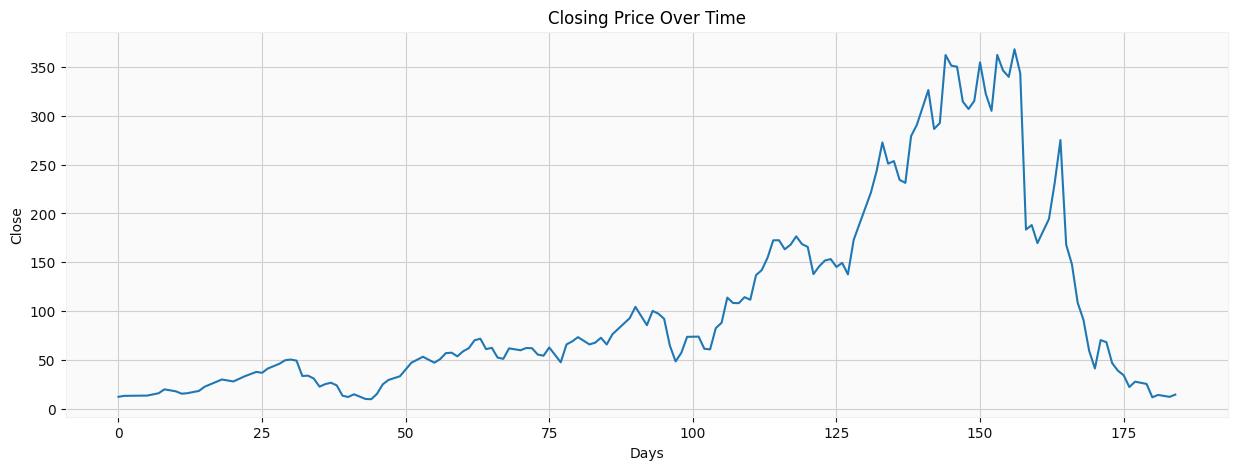

In [ ]:
#
plt.figure(figsize=(15, 5))
sns.lineplot(x=stock_df.index, y='Close', data=stock_df)
plt.title('Closing Price Over Time')
plt.xlabel('Days')
plt.show()

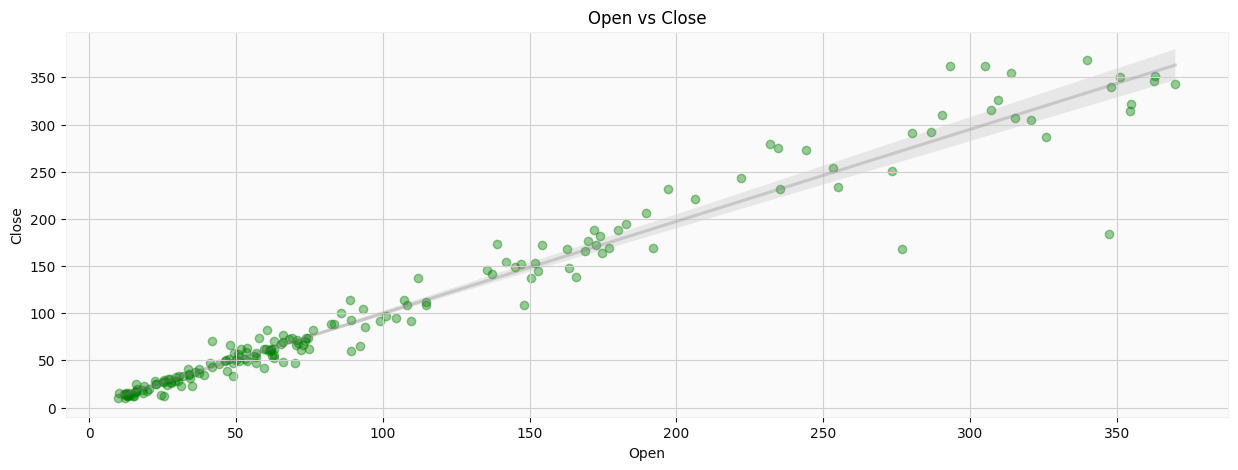

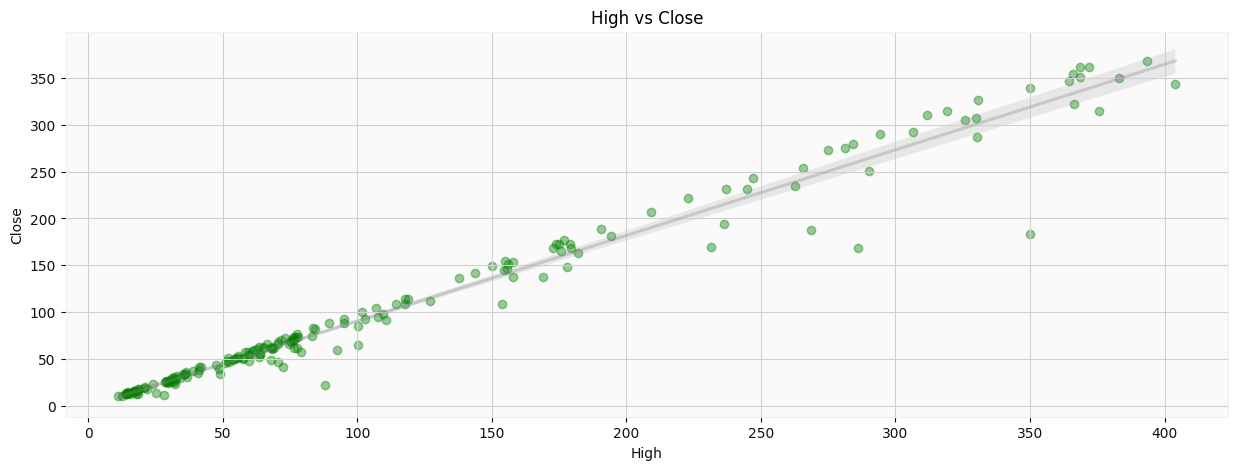

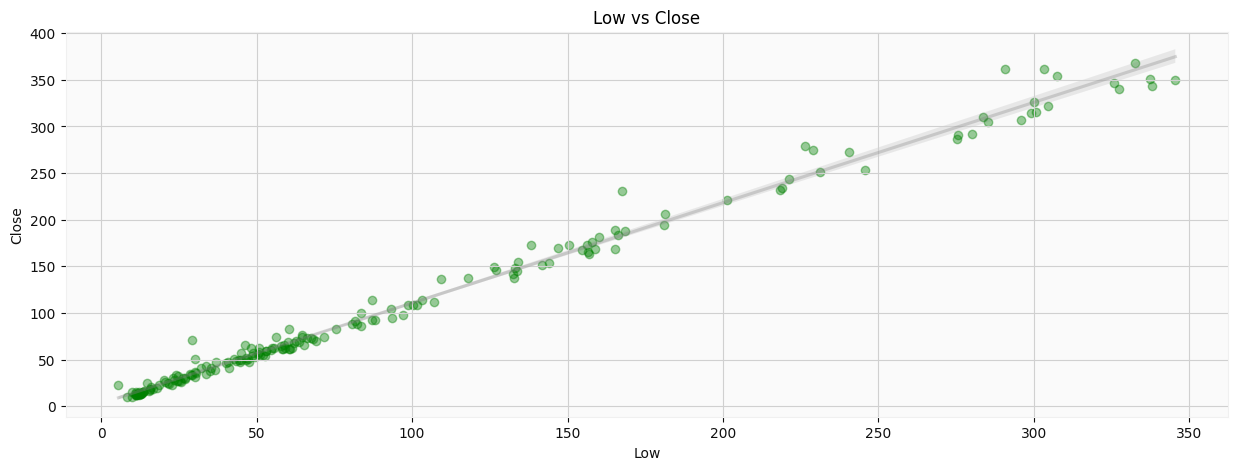

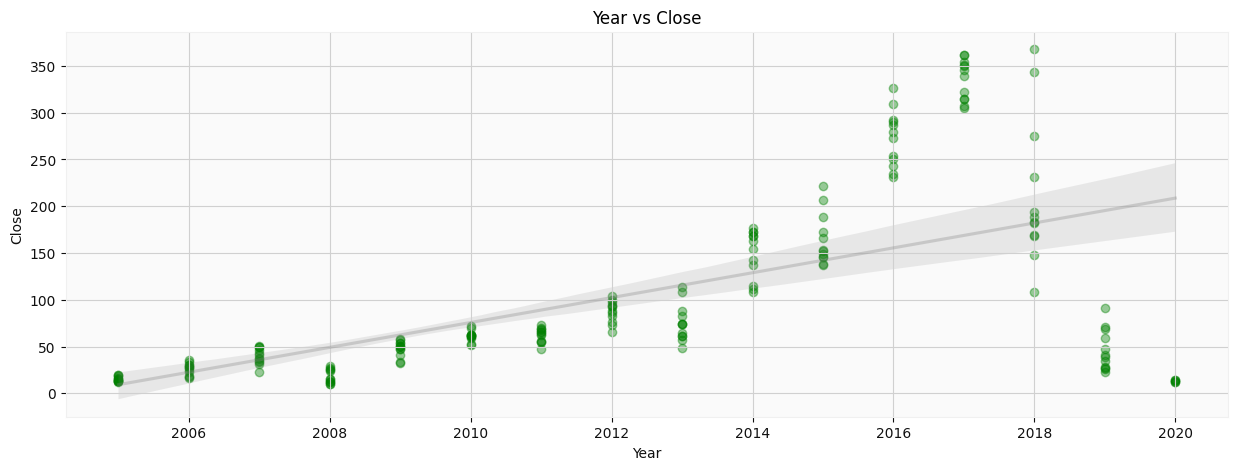

In [ ]:


for col in stock_df.columns:
    if col != 'Close':
        # Skip non-numeric columns after conversion
        if not pd.api.types.is_numeric_dtype(stock_df[col]):
            continue

        plt.figure(figsize=(15,5))
        sns.regplot(
            x=col, y='Close', data=stock_df,
            scatter_kws={'color':'green', 'alpha':0.4},
            line_kws={'color':'gray', 'alpha':0.3}
        )
        plt.title(f'{col} vs Close')
        plt.show()



**CandleStick patterns**

<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


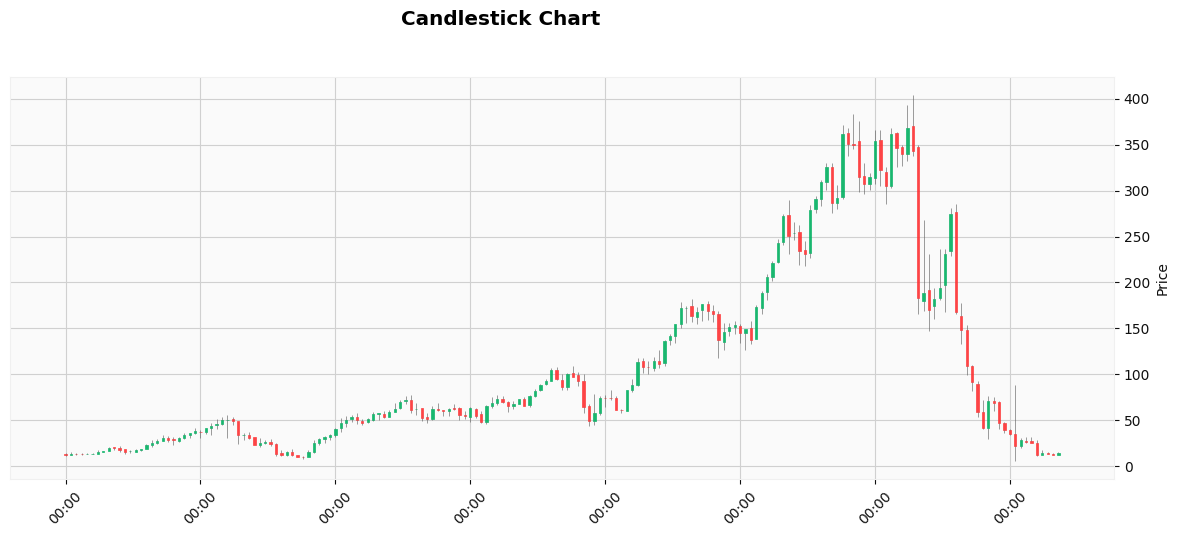

In [ ]:
!pip install mplfinance
import mplfinance as mpf

# 1️⃣ Convert the index (which is currently 'Date') to datetime
# we are creating date column as an index

stock_df.index = pd.to_datetime(stock_df.index, errors='coerce')

# 2️⃣ Drop any invalid datetime rows (just in case)
stock_df = stock_df[stock_df.index.notnull()]

# 3️⃣ Select only the required columns
CandleStick_df = stock_df[['Open', 'High', 'Low', 'Close']]

# 4️⃣ Confirm index type (should be DatetimeIndex)
print(type(CandleStick_df.index))   # ✅ must print <class 'pandas.core.indexes.datetimes.DatetimeIndex'>

# 5️⃣ Plot the candlestick chart
mpf.plot(CandleStick_df, type='candle', style='yahoo', title='Candlestick Chart',figratio=(16, 6))



###**Multivariate Analysis**

**Plot a heatmap to visualize correlations.**

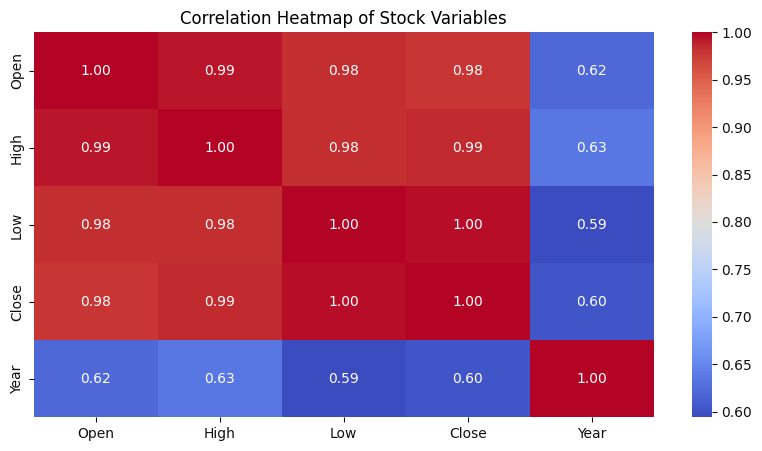

In [ ]:
# Select only numeric columns
numeric_df = stock_df.select_dtypes(include='number')

plt.figure(figsize=(10,5))

# Create heatmap
sns.heatmap(
    numeric_df.corr(),
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0
)

sns.despine(left=True, bottom=True)
plt.grid(False)
plt.title("Correlation Heatmap of Stock Variables")
plt.show()


**Inference Drawn:**
Every feature is extremely corelated with each other, so taking just one feature or average of these features would suffice for our regression model as linear regression assumes there is no multi colinearity in the features.

we will try to reducing multicollinearity using transformation of variables

In [ ]:
#Select Numeric column only
cf = stock_df.select_dtypes(include='number')


# lets perform the power analysis using PowerTransformer
pw = PowerTransformer(method='box-cox',standardize=True)

In [ ]:
# making a object where we can apply the power analysis transformation
#Select Numeric colu,n only
#cf = stock_df.select_dtypes(include='number')


In [ ]:
# Performing the power analysis transformation on the object where we store the data, in the form of dataframe
# so we can get a tranformed dataframe
kf = pd.DataFrame(pw.fit_transform(cf), columns=cf.columns)

In [ ]:
# checking the transformed data
kf.head()

,Open,High,Low,Close,Year
0,-1.671724,-1.762828,-1.622235,-1.709751,-1.62586
1,-1.704449,-1.700176,-1.518365,-1.635775,-1.62586
2,-1.635576,-1.700867,-1.539820,-1.644731,-1.62586
3,-1.656505,-1.728898,-1.529800,-1.668243,-1.62586
4,-1.645239,-1.771672,-1.493670,-1.636518,-1.62586


In [ ]:
# renaming the columns as they were before transformation
kf.rename(columns={0:'Open',1:'High',2:'Low',3:'Close'},inplace=True)

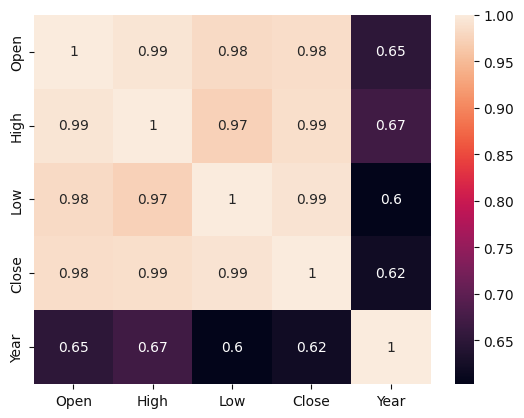

In [ ]:
# checking the correlation between transformed columns by using heatmap
sns.heatmap(kf.corr(),annot=True)
plt.grid(False)

In [ ]:
# creating object of all the columns in a list of transformed data
col = list(kf.columns)

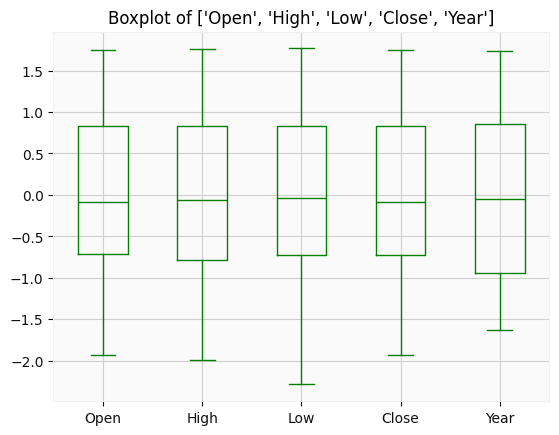

In [ ]:
# now visualise the data by using box plot of transformed data


ax = kf[col].plot(
    kind='box',
    title=f'Boxplot of {col}',
    color='green'
)

plt.show()


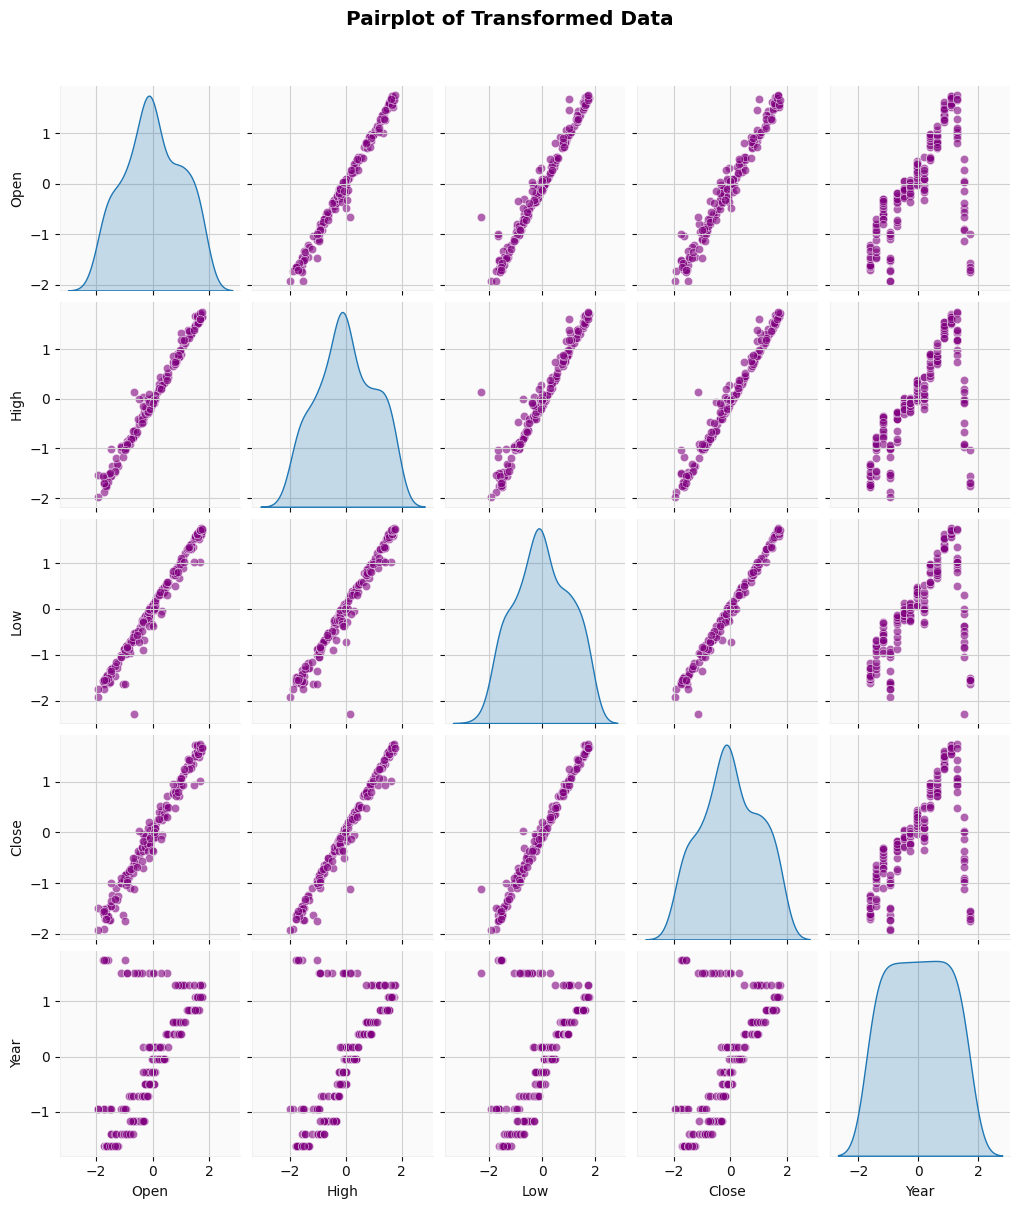

In [ ]:
# lets see the relationship between diffrent variables of the transformed data , by using pair plot

sns.pairplot(
    kf,
    diag_kind='kde',      # use KDE on diagonal instead of histogram
    plot_kws={'color':'purple', 'alpha':0.6},  # scatter plot color and transparency
    diag_kws={'shade':True},                   # shading for KDE on diagonal
    height=2.3,          # height of each subplot
    aspect= 0.9        # width = height * aspect
)

plt.suptitle("Pairplot of Transformed Data", y=1.05)  # title above the plots
plt.show()


# **4) Hypothesis Testing**

##**Hypothesis 1:** Is the mean 'Close' price before 2018 significantly different from after 2018?

**Perform an appropriate statistical test.**

In [ ]:
# Perform Statistical Test to obtain P-Value
# Hypothesis 1: Is the mean 'Close' price before 2018 significantly different from after 2018?
before_2018 = stock_df[stock_df['Year'] < 2018]['Close']
after_2018 = stock_df[stock_df['Year'] >= 2018]['Close']

# Perform t-test
t_stat, p_value = stats.ttest_ind(before_2018, after_2018, equal_var=False)
print("\nHypothesis Test 1: Mean comparison of Close price before and after 2018")
print(f"T-Statistic: {t_stat:.4f}, P-Value: {p_value:.4f}")

if p_value < 0.05:
    print("Conclusion: Statistically significant difference in Close prices before and after 2018.")
else:
    print("Conclusion: No significant difference in Close prices before and after 2018.")


Hypothesis Test 1: Mean comparison of Close price before and after 2018
T-Statistic: -0.2567, P-Value: 0.7988
Conclusion: No significant difference in Close prices before and after 2018.


**1.)Which statistical test have you done to obtain P-Value?**

Answer:

**Independent Two-Sample t-test (Welch’s t-test):**


*   stats.ttest_ind() is used to compare the means of two independent samples (in this case, Close prices before and after 2018).
*   The parameter equal_var=False indicates we do not assume equal population variance, which makes it a Welch's t-test, a more robust version of the t-test.


**2.)Why did you choose the specific statistical test?**

Answer:

*   You're comparing average values of a numeric variable across two groups (e.g., pre-2018 vs. post-2018).
*   Sample sizes or variances are unequal.









# **5) Feature Engineering & Data Pre-Processing**

**1. Data Transformation**

A visual inspection of their distribution showed mild skewness and hence we used power transformer to hanlde skewness in our dataset.

In [ ]:
#Printing first 5 rows of transformed data
kf.head()

,Open,High,Low,Close,Year
0,-1.671724,-1.762828,-1.622235,-1.709751,-1.62586
1,-1.704449,-1.700176,-1.518365,-1.635775,-1.62586
2,-1.635576,-1.700867,-1.539820,-1.644731,-1.62586
3,-1.656505,-1.728898,-1.529800,-1.668243,-1.62586
4,-1.645239,-1.771672,-1.493670,-1.636518,-1.62586


**2. Data Scaling**


In [ ]:
# Scaling your data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


**3. Dimesionality Reduction**

**Answer:**

Since the dataset is small, focused, and well-engineered, dimensionality reduction techniques are not required for this regression task.

**4. Data Splitting**

In [ ]:
kf.columns

Index(['Open', 'High', 'Low', 'Close', 'Year'], dtype='object')

**Dropping Non-Numeric Features**

In [ ]:
# Drop 'Year' since it's not a numeric feature
df_model = kf.drop(['Year'], axis=1)

In [ ]:
#List of columns after dropping Year
df_model.columns

Index(['Open', 'High', 'Low', 'Close'], dtype='object')

**Defining Independent & Dependent Variable**

In [ ]:
# assigning the dependent variable
dependent_variable = 'Close'

# assigning independent variables
independent_variable = list(set(df_model.columns.tolist())-{dependent_variable})

**Define X and y**

In [ ]:
# lets devide the dataset into two part , X and y
# where X is collection of independent variables , and y is dependent variable
X=df_model[independent_variable].values
y=df_model[dependent_variable].values

**Standardize Features**

In [ ]:
# Standardize features
scaler = StandardScaler()
X_Scaled = scaler.fit_transform(X)

**Train-Test split**

In [ ]:
# now performing split by using train_test_split with the transformed data
X_train,X_test,y_train,y_test = train_test_split(X_Scaled,y,test_size=0.2,random_state=42)

In [ ]:
print("Training Feature Shape:", X_train.shape)
print("Testing Feature Shape:", X_test.shape)

Training Feature Shape: (148, 3)
Testing Feature Shape: (37, 3)


What data splitting ratio did we used and why?


**Answer:**
we used an **80:20 train-test split** ratio.

       a.)80% of the data was used for training the machine learning models to learn the patterns.

        b.)20% of the data was kept for testing to evaluate how well the model generalizes on unseen data.

        c.)This is a standard industry practice that provides a good balance between training and validation while avoiding overfitting or underfitting.

        d.)The dataset has a moderate size (185 rows), so 80:20 offers enough training samples while keeping a meaningful test set.


# **6) ML Model Implementation**


##**Model 1: Linear Regression:**


 Model 1 -Linear Regression
MAE: 0.06598457917373912
MSE: 0.009238284919667926
RMSE: 0.09611599720997502
R2 Score: 0.9892286101497829


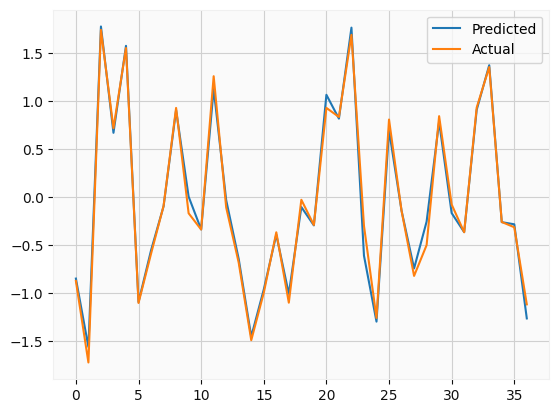

In [ ]:
# performing Linear regression on the transformed data
model1 = LinearRegression()

#fit the model
model1.fit(X_train, y_train)

#Predict the model
y_pred1 = model1.predict(X_test)



#Evaluation metrics

linear_mae =  mean_absolute_error(y_test, y_pred1)
linear_mse = mean_squared_error(y_test, y_pred1)
linear_rmse =  np.sqrt(mean_squared_error(y_test, y_pred1))
linear_r2 = r2_score(y_test, y_pred1)


print("\n\033[1m Model 1 -Linear Regression\033[0m")
print("MAE:", linear_mae)
print("MSE:", linear_mse)
print("RMSE:", linear_rmse)
print("R2 Score:", linear_r2)


#Plot the graph
plt.plot(y_pred1)
plt.plot(y_test)
plt.legend(["Predicted","Actual"])

plt.show()

##**Model 2: K-Nearest Neighbors (KNN):**

In [ ]:
# importing KNN library
from sklearn.neighbors import KNeighborsRegressor
# importing gridsearch
from sklearn.model_selection import GridSearchCV

# creating object of model2
model2 = KNeighborsRegressor()

# randomely taking paramets of n_neighbours
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}

# creating model for gridsearch for getting best parameters with respect to model2 model
model = GridSearchCV(model2,params,cv=5)

# fitting gridsearch model on the tranformed data
model.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9]})

In [ ]:
# lets see best paramets by the gridsearch
model.best_params_

{'n_neighbors': 2}


 Model 2 -KNN
MAE: 0.10776535068327853
MSE: 0.02491294642915144
RMSE: 0.1578383553802796
R2 Score: 0.9709527189690086


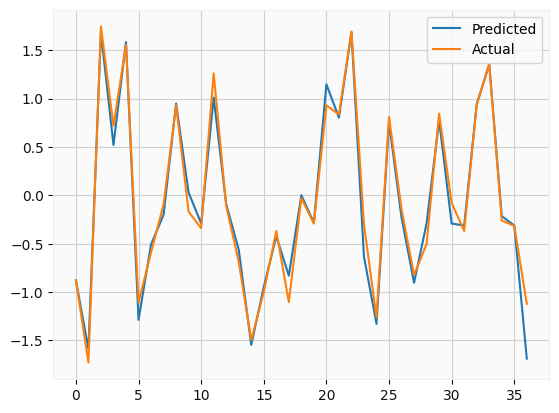

In [ ]:
# performing KNN regression by using that parameter
knn = KNeighborsRegressor(n_neighbors=2)


# fitting the model by using transofrmed data
knn.fit(X_train,y_train)

# predicting by using KNN model
knn_pred = knn.predict(X_test)

#Evaluation metrics

knn_mae = mean_absolute_error(y_test, knn_pred)
knn_mse = mean_squared_error(y_test, knn_pred)
knn_rmse = np.sqrt(mean_squared_error(y_test, knn_pred))
knn_r2 = r2_score(y_test, knn_pred)


print("\n\033[1m Model 2 -KNN\033[0m")
print("MAE:",knn_mae )
print("MSE:", knn_mse )
print("RMSE:", knn_rmse)
print("R2 Score:", knn_r2)

# lets see the visualization of the Knn prediction with the acutal data points
plt.plot(knn_pred)
plt.plot(y_test)
plt.legend(["Predicted","Actual"])

plt.show()

##**Model 3: RandomForest:**

In [ ]:
# performing random forest by using Grid search
model3 = RandomForestRegressor()
params = {'n_estimators':[100,200,300],'criterion':['squared_error', 'absolute_error', 'friedman_mse', 'poisson'],'max_features':['sqrt', 'log2', None]}
rf_model = GridSearchCV(model3,params,cv=5)

# fitting the model on the train data
rf_model.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error',
                                       'friedman_mse', 'poisson'],
                         'max_features': ['sqrt', 'log2', None],
                         'n_estimators': [100, 200, 300]})

In [ ]:
# lets see best paramets by the gridsearch
rf_model.best_params_

{'criterion': 'friedman_mse', 'max_features': None, 'n_estimators': 200}


 Model 3- RandomForest
MAE: 0.11684120753166272
MSE: 0.0413317897582169
RMSE: 0.20330221287092992
R2 Score: 0.9518091480654433


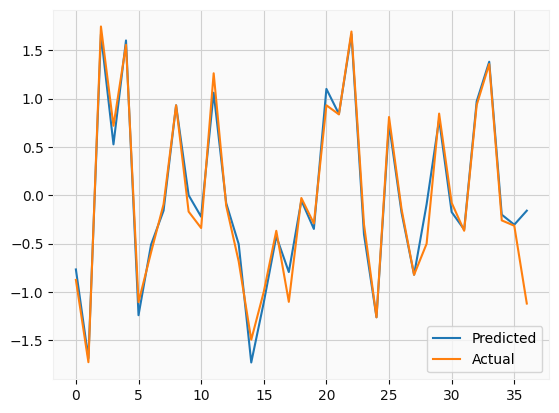

In [ ]:
# fitting the model by using parameters what gridsearch showed
rf = RandomForestRegressor(criterion= 'squared_error', max_features= None, n_estimators= 100)

# fiting the random forest model on the train data with gridSearch values
rf.fit(X_train,y_train)

#lets predict by using test data
rf_pred = rf.predict(X_test)

#Evaluation metrics

rf_mae =  mean_absolute_error(y_test, rf_pred)
rf_mse =  mean_squared_error(y_test, rf_pred)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_pred))
rf_r2 =   r2_score(y_test, rf_pred)
print("\n\033[1m Model 3- RandomForest\033[0m")
print("MAE:", rf_mae)
print("MSE:", rf_mse)
print("RMSE:", rf_rmse)
print("R2 Score:", rf_r2)

# lets see the visualization of the Knn prediction with the acutal data points
plt.plot(rf_pred)
plt.plot(y_test)
plt.legend(["Predicted","Actual"])

plt.show()

##**Model 4: Ridge Regression**

In [ ]:
# let's perform ridge regression by using the dame approach of grid search
model4 =Ridge()
param = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,0.3,0.7,1,1.2,1.33,1.365,1.37,1.375,1.4,1.5,1.6,1.8,2.5,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(model4, param, scoring='neg_mean_squared_error', cv=3)

# fitting the model on the train data
ridge_regressor.fit(X_train,y_train)




GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 0.3, 0.7, 1, 1.2, 1.33, 1.365, 1.37,
                                   1.375, 1.4, 1.5, 1.6, 1.8, 2.5, 5, 10, 20,
                                   30, 40, 45, 50, 55, 60, 100]},
             scoring='neg_mean_squared_error')

In [ ]:
# lets see best paramets by the GridSearch
ridge_regressor.best_params_

{'alpha': 0.01}


 Model 4- Ridge Regression
MAE: 0.06582742894381807
MSE: 0.009209816775745268
RMSE: 0.09596779030354542
R2 Score: 0.9892618026177755


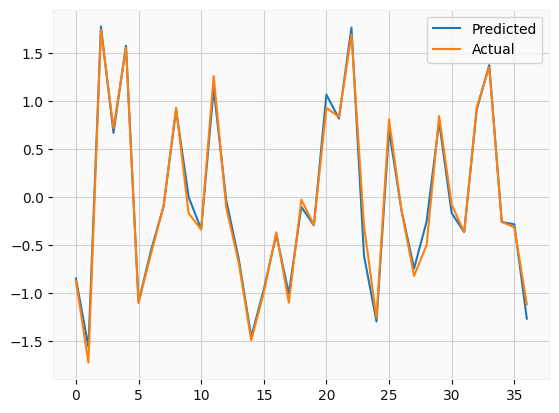

In [ ]:
# now we have the alpha (significance )value which we got by the help of grid search
ridge =Ridge(alpha= 0.01)

# performing the model fitting on the train data after grid search value
ridge.fit(X_train,y_train)

# predicting by themodel of ridge regression
y_pred_ridge = ridge.predict(X_test)


# #Evaluation metrics

ridge_mae = mean_absolute_error( y_test,y_pred_ridge)
ridge_mse = mean_squared_error( y_test,y_pred_ridge)
ridge_rmse = np.sqrt(mean_squared_error(y_test,y_pred_ridge))
ridge_r2 = r2_score(y_test,y_pred_ridge)

print("\n\033[1m Model 4- Ridge Regression\033[0m")
print("MAE:", ridge_mae)
print("MSE:", ridge_mse)
print("RMSE:", ridge_rmse)
print("R2 Score:", ridge_r2 )

# lets visualize the graph of actual and and predicted datapoints
plt.plot(y_pred_ridge)
plt.plot(y_test)
plt.legend(["Predicted","Actual"])

plt.show()

##**Model 5: Lasso Regression**

In [ ]:
# performing lasso regression by using the same approach

from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV


model5 =Lasso()
param = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,0.3,0.7,1,1.2,1.33,1.365,1.37,1.375,1.4,1.5,1.6,1.8,2.5,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(model5, param, scoring='neg_mean_squared_error', cv=3)
lasso_regressor.fit(X_train,y_train)


GridSearchCV(cv=3, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 0.3, 0.7, 1, 1.2, 1.33, 1.365, 1.37,
                                   1.375, 1.4, 1.5, 1.6, 1.8, 2.5, 5, 10, 20,
                                   30, 40, 45, 50, 55, 60, 100]},
             scoring='neg_mean_squared_error')

In [ ]:
# lets see the best parameters by GridSearch
lasso_regressor.best_params_

{'alpha': 1e-15}


 Model 5- Lasso Regression
MAE: 0.0659845791737386
MSE: 0.009238284919667925
RMSE: 0.09611599720997502
R2 Score: 0.9892286101497829


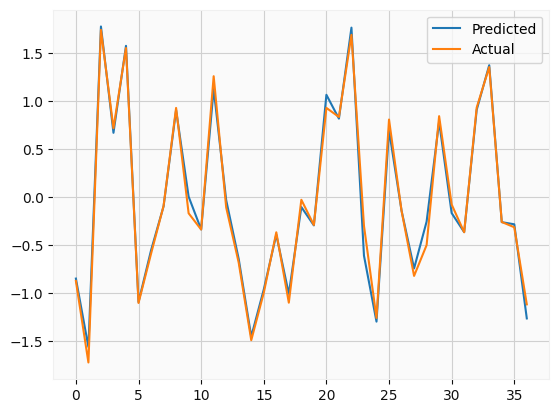

In [ ]:
# now we have the alpha (significance )value which we got by the help of grid search
Lasso =Ridge(alpha= 1e-15)

# performing the model fitting on the train data after grid search value
Lasso.fit(X_train,y_train)

# predicting by themodel of ridge regression
y_pred_lasso = Lasso.predict(X_test)


# #Evaluation metrics

lasso_mae = mean_absolute_error( y_test,y_pred_lasso)
lasso_mse = mean_squared_error( y_test,y_pred_lasso)
lasso_rmse = np.sqrt(mean_squared_error(y_test,y_pred_lasso))
lasso_r2 = r2_score(y_test,y_pred_lasso)
print("\n\033[1m Model 5- Lasso Regression\033[0m")
print("MAE:", lasso_mae)
print("MSE:", lasso_mse)
print("RMSE:", lasso_rmse )
print("R2 Score:", lasso_r2 )

# lets visualize the graph of actual and and predicted datapoints
plt.plot(y_pred_lasso)
plt.plot(y_test)
plt.legend(["Predicted","Actual"])

plt.show()

##**Model 6: ElasticNet Regression**

In [ ]:
# performing Elasticnet by using the same appraoch
model6 = ElasticNet()
param = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,0.001,0.01,0.02,0.03,0.04,1,5,10,20,40,50,60,100],
                          'l1_ratio':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]}
elastic_regressor = GridSearchCV(model6, param, scoring='neg_mean_squared_error', cv=5)
elastic_regressor.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.001, 0.01, 0.02, 0.03, 0.04, 1, 5,
                                   10, 20, 40, 50, 60, 100],
                         'l1_ratio': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                      0.9]},
             scoring='neg_mean_squared_error')

In [ ]:
# lets see the best parameters by GridSearch
elastic_regressor.best_params_

{'alpha': 1e-15, 'l1_ratio': 0.2}


 Model 6- ElasticNet Regression
MAE: 0.06598474632979476
MSE: 0.009238346642811382
RMSE:
R2 Score: 0.9892285381836066


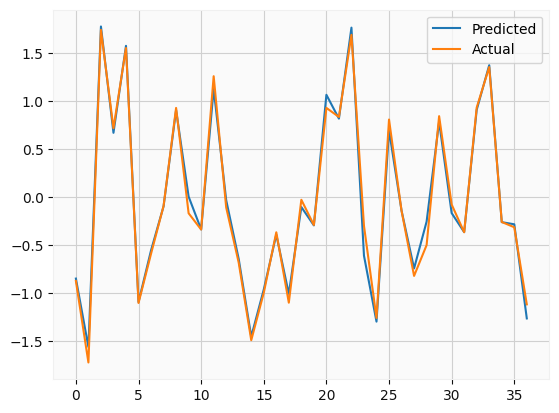

In [ ]:
# now we have the alpha (significance )value which we got by the help of grid search
elastic =ElasticNet(alpha = 1e-15, l1_ratio = 0.2)

# performing the model fitting on the train data after grid search value
elastic.fit(X_train,y_train)

# predicting by themodel of ridge regression
y_pred_elastic = elastic.predict(X_test)


# #Evaluation metrics

elastic_mae = mean_absolute_error( y_test,y_pred_elastic)
elastic_mse = mean_squared_error( y_test,y_pred_elastic)
elastic_rmse = np.sqrt(mean_squared_error(y_test,y_pred_elastic))
elastic_r2 = r2_score(y_test,y_pred_elastic)
print("\n\033[1m Model 6- ElasticNet Regression\033[0m")
print("MAE:", elastic_mae )
print("MSE:", elastic_mse)
print("RMSE:", )
print("R2 Score:", elastic_r2)

# lets visualize the graph of actual and and predicted datapoints
plt.plot(y_pred_elastic)
plt.plot(y_test)
plt.legend(["Predicted","Actual"])

plt.show()

##**Model 7: XGB Regression**


 Model 7- XGBoost Regressor
MAE: 0.12399773405594157
MSE: 0.03261216931643411
RMSE: 0.18058839751333447
R2 Score: 0.9619758004193242


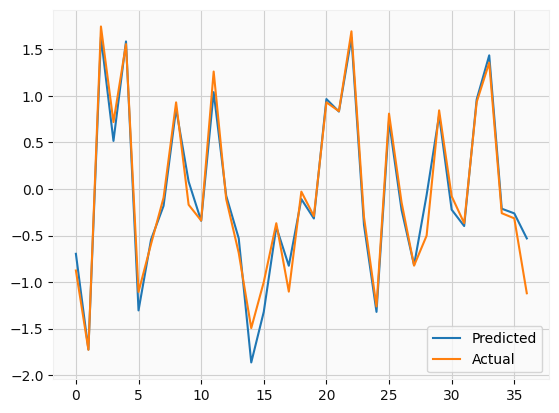

In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Instantiate and fit the model
model7 = XGBRegressor(random_state=42)
xgb_model = model7
xgb_model.fit(X_train, y_train)

# Predict
xgb_preds = xgb_model.predict(X_test)

# Evaluate
xgb_mae = mean_absolute_error(y_test, xgb_preds)
xgb_mse = mean_squared_error(y_test, xgb_preds)
xgb_rmse = np.sqrt(xgb_mse)
xgb_r2 = r2_score(y_test, xgb_preds)


# #Evaluation metrics
print("\n\033[1m Model 7- XGBoost Regressor\033[0m")
print("MAE:", xgb_mae)
print("MSE:", xgb_mse)
print("RMSE:", xgb_rmse)
print("R2 Score:",xgb_r2)

# lets visualize the graph of actual and and predicted datapoints
plt.plot( xgb_preds)
plt.plot(y_test)
plt.legend(["Predicted","Actual"])

plt.show()

#**7)Evaluation of Regression model's Performance report**

In [ ]:
# Create a summary DataFrame for all models and metrics
Evaluate_Performance = pd.DataFrame({
    'Model': [
        'Linear Regression',
        'Ridge Regression',
        'Lasso Regression',
        'Elastic Net Regression',
        'KNN Regression',
        'Random Forest Regression',
        'XGB Regression'
    ],
    'MAE': [linear_mae, ridge_mae, lasso_mae, elastic_mae, knn_mae, rf_mae,xgb_mae],
    'MSE': [linear_mse, ridge_mse, lasso_mse, elastic_mse, knn_mse, rf_mse,xgb_mse],
    'RMSE': [linear_rmse, ridge_rmse, lasso_rmse, elastic_rmse, knn_rmse, rf_rmse,xgb_rmse],
    'R² Score': [linear_r2, ridge_r2, lasso_r2, elastic_r2, knn_r2, rf_r2,xgb_r2]
})

# Optional: sort by R² Score descending (best first)
Evaluate_Performance = Evaluate_Performance.sort_values(by='R² Score', ascending=False).reset_index(drop=True)

# Display neatly rounded
Evaluate_Performance = Evaluate_Performance.round(6)
print(Evaluate_Performance)


                      Model       MAE       MSE      RMSE  R² Score
0          Ridge Regression  0.065827  0.009210  0.095968  0.989262
1         Linear Regression  0.065985  0.009238  0.096116  0.989229
2          Lasso Regression  0.065985  0.009238  0.096116  0.989229
3    Elastic Net Regression  0.065985  0.009238  0.096116  0.989229
4            KNN Regression  0.107765  0.024913  0.157838  0.970953
5            XGB Regression  0.123998  0.032612  0.180588  0.961976
6  Random Forest Regression  0.116841  0.041332  0.203302  0.951809


In [ ]:
Evaluate_Performance

,Model,MAE,MSE,RMSE,R² Score
0,Ridge Regression,0.065827,0.009210,0.095968,0.989262
1,Linear Regression,0.065985,0.009238,0.096116,0.989229
2,Lasso Regression,0.065985,0.009238,0.096116,0.989229
3,Elastic Net Regression,0.065985,0.009238,0.096116,0.989229
4,KNN Regression,0.107765,0.024913,0.157838,0.970953
5,XGB Regression,0.123998,0.032612,0.180588,0.961976
6,Random Forest Regression,0.116841,0.041332,0.203302,0.951809



# **8)Conclusion Drawn**

In [ ]:
#Summarize Findings:
print("Conclusions:")
print("- The dataset contains monthly stock prices of Yes Bank since its inception.")
print("- There is a significant impact on stock prices due to the fraud case involving Rana Kapoor in 2018.")
print("- No null values or duplicate data were found.")
print("- Despite outliers, they were retained to avoid data loss.")
print("- Applied power transformation to handle positively skewed distribution.")
print("- High correlation between dependent and independent variables indicates a good prediction potential.")
print("- High multicollinearity among independent variables due to small dataset.")
print("- Ridge Regressor performed the best with an R2 score of 0.989262.")

Conclusions:
- The dataset contains monthly stock prices of Yes Bank since its inception.
- There is a significant impact on stock prices due to the fraud case involving Rana Kapoor in 2018.
- No null values or duplicate data were found.
- Despite outliers, they were retained to avoid data loss.
- Applied power transformation to handle positively skewed distribution.
- High correlation between dependent and independent variables indicates a good prediction potential.
- High multicollinearity among independent variables due to small dataset.
- Ridge Regressor performed the best with an R2 score of 0.989262.


In [ ]:
#Project Utility for Stakeholders:
print("Utility for Stakeholders:")
print("- Accurate prediction of closing prices can assist investors in making informed decisions.")
print("- Helps in understanding the impact of major events on stock prices.")
print("- Provides a basis for further financial analysis and investment strategies.")

Utility for Stakeholders:
- Accurate prediction of closing prices can assist investors in making informed decisions.
- Helps in understanding the impact of major events on stock prices.
- Provides a basis for further financial analysis and investment strategies.


#                                           **Thank You So Much!!!!!!**

In [ ]:
                                                                                                 #Thank You !!!!!!!